# <span style = "color:#068c2a;font-family:monospace"> Support Vetor Machines

## <span style = "color:#068c2a;font-family:monospace">Support Vector Machines are one of the more complex algorithms

### <span style = "color:#068c2a;font-family:monospace"> To understand SVM and its terms we needs to go through some history

## <span style = "color:#068c2a;font-family:monospace"> SVM History

### <span style = "color:#068c2a;font-family:monospace"> Support Vector Machines is one of the recently developed machine learning algorithms</span>
### <span style = "color:#068c2a;font-family:monospace"> It was first developed in 1960 and published in 1963 for Image analysis by computers

##  <span style = "color:#068c2a;font-family:monospace"> In 1964 new puclication came as "theoretical Foundations of potential function menthod in pattern recongnition which introduces the geometrical interpretation of the kernels as inner products in featur space

### <span style = "color:#068c2a;font-family:monospace"> In 1992 it was Isabelle Guyon and Vladimir Vapnick(Father of Support vector Machine) suggested a way to create nonlinear classifiers by applying ther Kernel trick to maximum margin hyperplanes.

### <span style = "color:#068c2a;font-family:monospace">It took 30 years of work to get to the version of Support Vector Machines we will use. Although work continues for improvements in implementation and performance</span>
### <span style = "color:#068c2a;font-family:monospace">In our SVM learning we will move from Maximum Margin Classifiers , to Support Vector Classifier and finally Support Vector Machines

## <span style = "color:#068c2a;font-family:monospace">Let's begin by understanding what is Hyperplane

## <span style = "color:#068c2a;font-family:monospace"> In a N-dimensional space, a hyperplane is a flat affine(preserving) space of hyperplane dimension N -1</span>
## <span style = "color:#068c2a;font-family:monospace"> For example:
* 1-D Hyperplane is a single point
* 2-D Hyperplane is a line
* 3-D Hyperplane is flat plane

### <span style = "color:#068c2a;font-family:monospace"> 1-D Hyperplance is a single point</span>
$\Large{x}\leftarrow{|}\rightarrow$
### <span style = "color:#068c2a;font-family:monospace"> on a any given feature x any given point is a single point </span>

### <span style = "color:#068c2a;font-family:monospace"> In 2-D hyperplane is a line</span>
### <span style = "color:#068c2a;font-family:monospace"> For two feature x1 and x2 , you connect two data point through line so hyperplane becomes line</span>

### <span style = "color:#068c2a;font-family:monospace"> 3-D hyperplane is a plane</span>


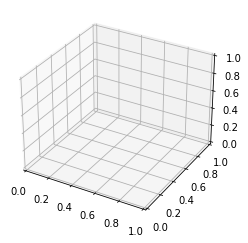

In [31]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()

## <span style = "color:#068c2a;font-family:monospace"> Bottom plane is Hyperplane in 3-D

## <span style = "color:#068c2a;font-family:monospace"> The main idea behind SVM is that we can use Hyperplanes to create a sepration between classes.</span>
## <span style = "color:#068c2a;font-family:monospace"> Then new points will fall on one side of this sperating hyperplanes, which we can then use to assign a class.

## <span style = "color:#068c2a;font-family:monospace"> Imagine a data set with one feature and one binary target label.</span>
## <span style = "color:#068c2a;font-family:monospace"> For Example:
* A weight feature for baby chicks.
* Classified by Male or Female.</span>
## <span style = "color:#068c2a;font-family:monospace"> What would this look like visualized?

$\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}\rule{1cm}{3pt}\rule{1cm}{3pt}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}$

### <span style = "color:#068c2a;font-family:monospace"> ${<>}$ = Male,${O}$ = Female</span>
### <span style = "color:#068c2a;font-family:monospace"> Place the points alog feature

### <span style = "color:#068c2a;font-family:monospace"> Notice in the above example, classes are perfectly seperable. This is unlikely in read world datasets.

$\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{\large{|}}\rule{1cm}{3pt}\rule{1cm}{3pt}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}$

## <span style = "color:#068c2a;font-family:monospace"> The main idea behind SVM is to create a sparating hyperplane between the classes.

### <span style = "color:#068c2a;font-family:monospace"> Now if any new point would be classified based on what side of the point they land on if any new point falls on side of ${O}$ it can be classifed as female and if it falls on side of ${<>}$ can be classifed as male.

### <span style = "color:#068c2a;font-family:monospace">But the main question comes how to we chosse where to put the seperating hyperplane, so we need to decide which hyperplane is the "best" separator between the classes</span>
### <span style = "color:#068c2a;font-family:monospace"> We need to use some qunatification method to choose the best seperating hyperplane that maxmizes the margins between the classes.</span>
### <span style = "color:#068c2a;font-family:monospace"> This is known as Maximum Margin Classfier, though keep in mind this is not Support Vector Machine yet,This is a base to build upon Support Vector Machines

## <span style = "color:#068c2a;font-family:monospace"> This above idea of maximum margins applied to N-dimensions

## <span style = "color:#068c2a;font-family:monospace"> Now imagine the same in 2 dimensional feature space:

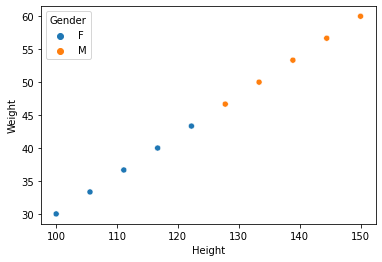

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.DataFrame({"Height":list(np.linspace(100,150,10)),"Weight":list(np.linspace(30,60,10)),"Gender":["F","F","F","F","F","M","M","M","M","M"]})
sns.scatterplot(x= "Height",y="Weight",data = data, hue = "Gender", palette=('tab10'));

### <span style = "color:#068c2a;font-family:monospace"> With the above example there could be different possibel line or hyperplanes which could sperate the male and female, but there should be some ideal line which maximizes the margins

# <span style = "color:#068c2a;font-family:monospace"> what happens if the clasess are not perfectly sperable for e.g.

$\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{<>}\rule{1cm}{3pt}\rule{1cm}{3pt}\rule{1cm}{3pt}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}{O}\rule{1cm}{3pt}$

### <span style = "color:#068c2a;font-family:monospace">In the above example there is one female data point falling in between male class, To handle this kind of situation we will have a bias-variance trade off depending where we place the hyperplanse seperator

### <span style = "color:#068c2a;font-family:monospace"> Distance between our threshold(hyperplane) and the observations of each clases is SOFT margin. Soft margin allows for misclassification inside the margins.</span>
### <span style = "color:#068c2a;font-family:monospace"> As we are introduced to the soft margin there could be many possible threshold splits within the soft margins.We are using maximum margin classifier to deal with this issue and we can achieve this by using cross validation

## <span style = "color:#068c2a;font-family:monospace"> While using the Maximum Margin classifier it could be a possibility we pick up too much variance from one class, instead we want a SUPPORT Vector Classifier (soft margin). We allow a bit of miscalssfication in the model to increase a little bias and decrease the variance by using soft margin concept

### <span style = "color:#068c2a;font-family:monospace"> All above examples were related to classes which are perfectly sperable but there could be a situation where even after allowing for many miscalssification the hyperplane perfroms poor?</span>
## <span style = "color:#068c2a;font-family:monospace"> Here we introduce the concept of Support Vector Machines

### <span style = "color:#068c2a;font-family:monospace"> SMV's uses kernels to project the data to a higher dimension, in order to use a hyperplane in higher dimension to spearate the data.

# <span style = "color:#068c2a;font-family:monospace">SVM -Kernel

## <span style = "color:#068c2a;font-family:monospace"> Kernels allow us to move beyond a Support Vector Classfier and use SUpport Vector Machines.</span>
## <span style = "color:#068c2a;font-family:monospace"> There are variety of kernerls we can use to "project" the features to a higher dimension.

## <span style = "color:#068c2a;font-family:monospace"> An example is a polynomial kernel could expand onto an ${X}^{2}$ dimension

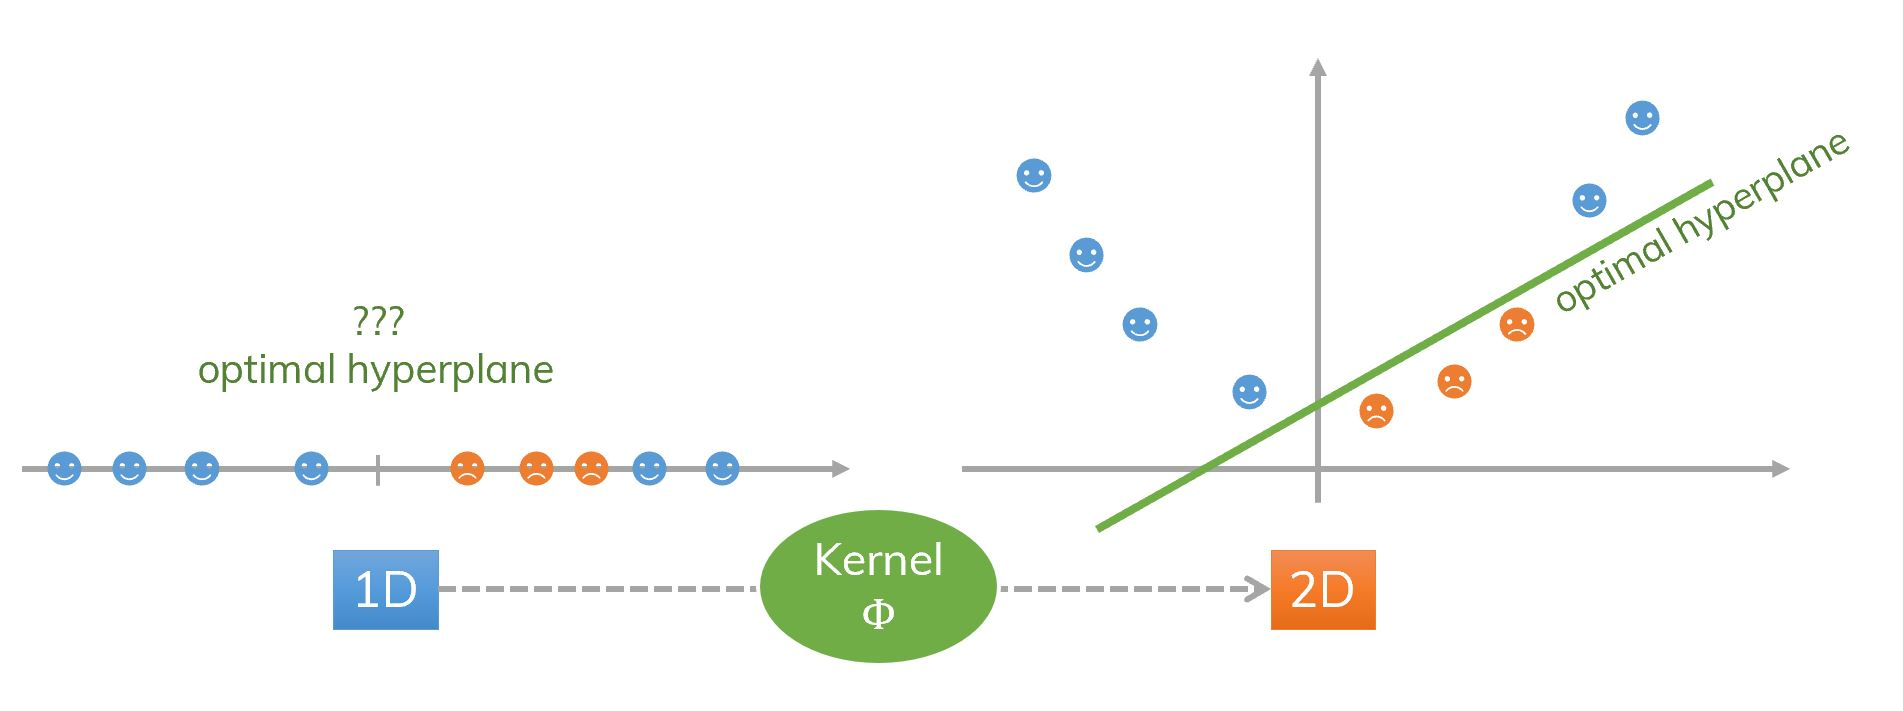

## <span style = "color:#068c2a;font-family:monospace"> By using the polynomial kernel we can see the we can create a optimal hyperplane even with mixed classes, Here by using ${X}^{2}$ we have made 1-D to 2-d

### <span style = "color:#068c2a;font-family:monospace"> Now, Let's Explore 2-D feature space where a hyperplane can't separate effectively even with soft margins. What we can do?

## <span style = "color:#068c2a;font-family:monospace"> We can use Support Vector Machines to enable the use of a kernel transformation to project to higher dimension 

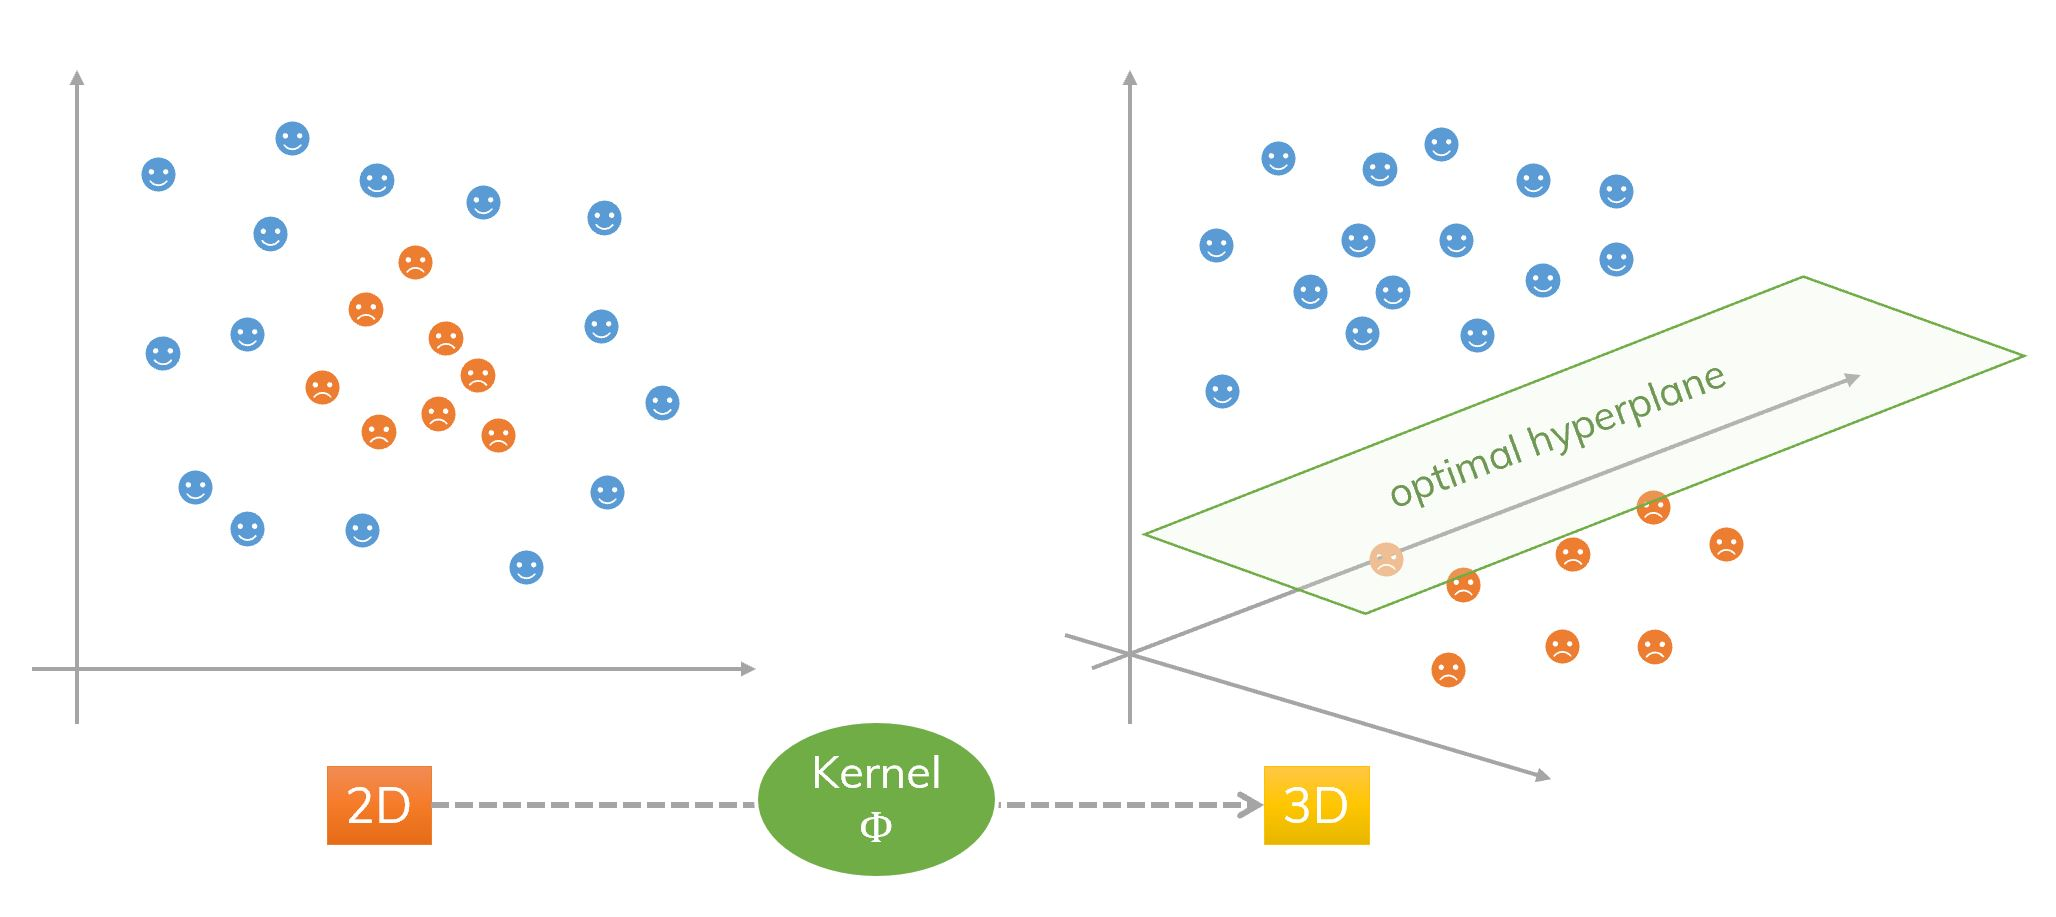

## <span style = "color:#068c2a;font-family:monospace"> We can see here how SVM helps with use of kernel transformation to project to a higher dimension and finding the hyperplane

### <span style = "color:#068c2a;font-family:monospace"> Use of Kernerls in SVM is know as "Kernel trick"</span>
### <span style = "color:#068c2a;font-family:monospace"> Mathematically , the Kernel trick actually avoids recomputing the points in a higher dimensional space!. Kernel trick achieve this by taking advantange of dot products of the transpostions of the data.

# <span style = "color:#068c2a;font-family:monospace"> SVM -Kernel Trick and Math

# <span style = "color:#068c2a;font-family:monospace">Maximum Margin Classifier

## <span style = "color:#068c2a;font-family:monospace"> Hyperplane in 2-D is a line can be expained as below</span>
$\large\beta_{0}{ + }\beta_{1}{X}_{1} { + }\beta_{2}{X}_{2} { = }{0}$
## <span style = "color:#068c2a;font-family:monospace"> This is something we have seen before as well

##  <span style = "color:#068c2a;font-family:monospace"> The whole idea behind the hyperplanes in support vector machines is to separate out classes</span>
## <span style = "color:#068c2a;font-family:monospace"> Let's consider value above 0 will fall on one side of the hyperplane and value below 0 fall on the other side</span>

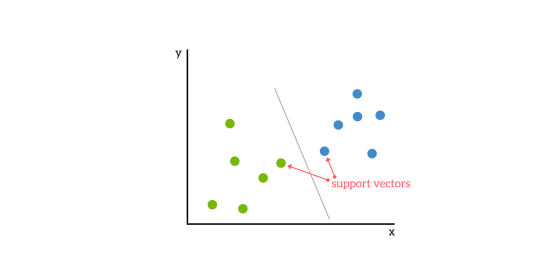

## <span style = "color:#068c2a;font-family:monospace"> like blue
$\large\beta_{0}{ + }\beta_{1}{X}_{1} { + }\beta_{2}{X}_{2}{ + }{....}{ + }\beta_{p}{X}_{p} { > }{0}$</span>
## <span style = "color:#068c2a;font-family:monospace"> Green
$\large\beta_{0}{ + }\beta_{1}{X}_{1} { + }\beta_{2}{X}_{2}{ + }{....}{ + }\beta_{p}{X}_{p} { < }{0}$</span>

### <span style = "color:#068c2a;font-family:monospace"> Now we have set of equation to decide upon which side of the hyperplane the new datapoint will fall upon

## <span style = "color:#068c2a;font-family:monospace"> The last consideration we have to make to mathematically define Maximum margin classifer are the data points itself, We use the data points as the transpose matrix of X which means if we take example of of a Data with (x,p) where x is number of rows and p is number of feature, it will become a data with (p,x), where each column will have data for every feature

## <span style = "color:#068c2a;font-family:monospace"> Now with this knowledge let's define Max Margin classifier
Maximise M
$\large\beta_{0}{, }\beta_{1}{, }{....}\beta{p}{, }{M}$</span>
## <span style = "color:#068c2a;font-family:monospace"> ${M}$ is the margin extending the hyperplane, so we are tyring to choose the best beta coefficients which can maximize M


## <span style = "color:#068c2a;font-family:monospace"> but we have some constraint i.e With Max Margin classfier no datapoints can be within margin

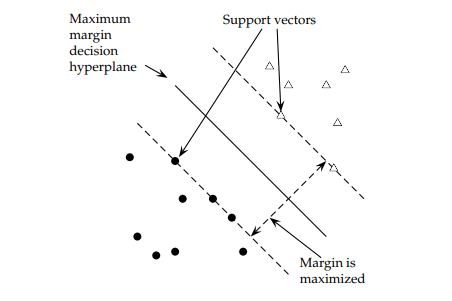

## <span style = "color:#068c2a;font-family:monospace"> The Dashed lines are the soft margin and no datpoints should fall in between

### <span style = "color:#068c2a;font-family:monospace"> Also MMC is subject to following euation
$\large\sum_{j=1}^{p}\beta^{2}_{j}{ = }{1}$ </span>
## <span style = "color:#068c2a;font-family:monospace"> With this above constrain we can calculate orthogonal distance between anypoint to the hyperplane</span> 

# <span style = "color:#068c2a;font-family:monospace"> Support Vector Classfier

## <span style = "color:#068c2a;font-family:monospace"> Now Recall Support Vector Classifier is differnt from Maximum Margin Classifier and allows the misclassification

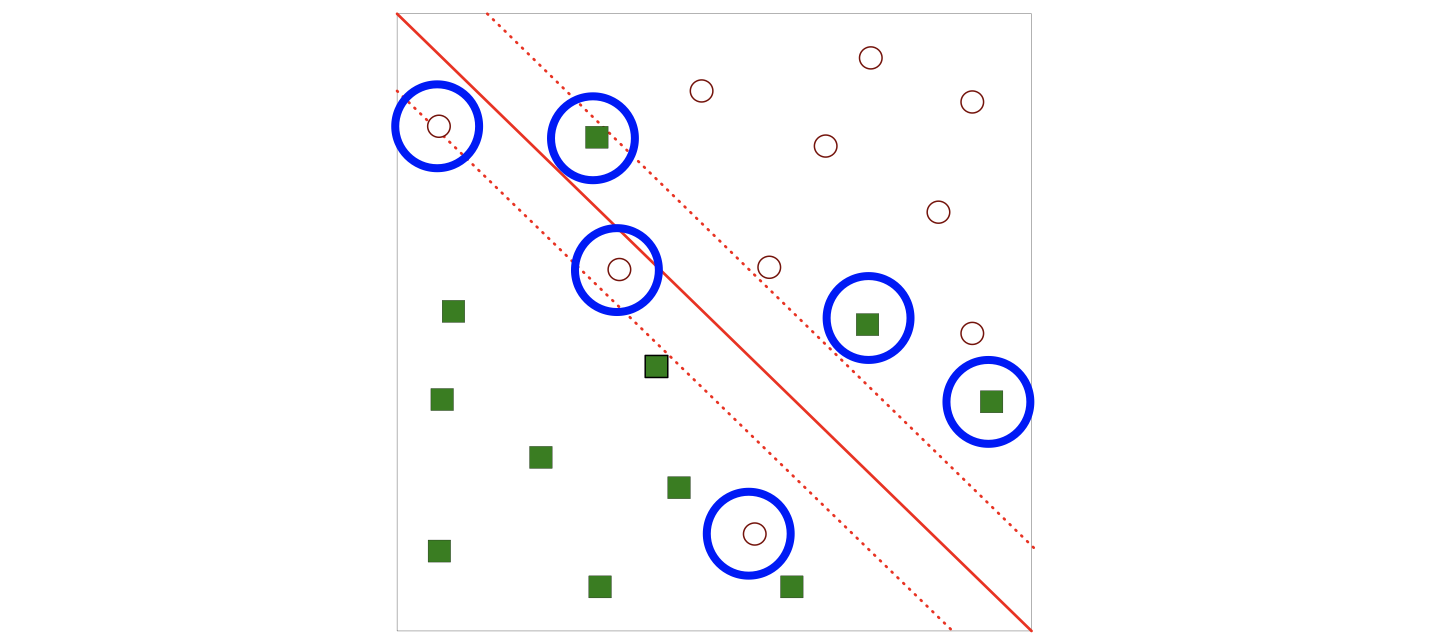

## <span style = "color:#068c2a;font-family:monospace"> We still want to maximise and we are still subject to $\large\sum^{p}_{j=1}\beta^{2}_{j}{ = }{1}$</span>
## <span style = "color:#068c2a;font-family:monospace"> Now this being Support vector classifier we allow an error term
$\large\epsilon_{i}\ge{0}{,}\sum^{n}{i=1}\epsilon_{i}\le{C}$

## <span style = "color:#068c2a;font-family:monospace">"C" value in this error term is to decide how many misclassification will be allowed

###  <span style = "color:#068c2a;font-family:monospace"> In Sklearn C is the regularization parameter so to use C in SVM it is inversely proportional. We will explore while doing practical

# <span style = "color:#068c2a;font-family:monospace"> Support Vector Machines

## <span style = "color:#068c2a;font-family:monospace"> Recall we use Support Vector Machines when we are not able to find clearly seperable hyperplane

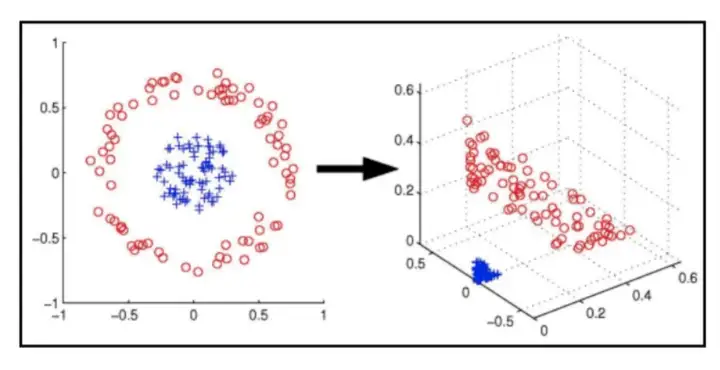

### <span style = "color:#068c2a;font-family:monospace"> We can see above Left hand side we have datapoints which have two classes and first class is surronded by another</span>
### <span style = "color:#068c2a;font-family:monospace"> Mathematically lets say we have
${X}_{1}{, }{X}_{2}{, }.......{X}_{p}{,}$</span>
### <span style = "color:#068c2a;font-family:monospace"> We can covert it to higher dimension shown in right hand side using polynomial kerner:
${X}_{1}{, }{X}^{2}_{1}{, }{X}_{2}{, }{X}^{2}_{2}{,......, }{X}_{p}{,}{X}_{p}^{2}$

## <span style = "color:#068c2a;font-family:monospace">  And we can still allow missclassification in this higher feature space</span>
### <span style = "color:#068c2a;font-family:monospace">Again we want to maximize the margin but this time we have lot more beta coefficients due to polynimial kernel transformation</span>


## <span style = "color:#068c2a;font-family:monospace"> Now the question comes how to deal with very large feature space?</span>
### <span style = "color:#068c2a;font-family:monospace"> As polynmical degree order grows larger the number of compuation necessary to solve for margins also grows!</span>
### <span style = "color:#068c2a;font-family:monospace"> Well the answer lies in the kernel trick which makes use of the innter product of vectors also know as dot product

## <span style = "color:#068c2a;font-family:monospace">Dot Product
${(}{a,b}{)}{ = } \sum^{r}_{i=1}{a}_{i}{b}{i}$

### <span style = "color:#068c2a;font-family:monospace"> Which mean we have two vectors a and b
$\Large{a}\cdot{b}{ = }{a}_{1}{b}_{1}{ + }{a}_{2}{b}_{2}$

# <span style = "color:#068c2a;font-family:monospace"> Linear Support Vector Classifier

$\large{f}{(}{x}{)}{ = } \beta_{0} { + }\underline{\sum_{i=1}^{n}\alpha_{i}{(}{x}{, }{x}_{i}{)}}$

#### <span style = "color:#068c2a;font-family:monospace"> The underline part we are calulating the inner products of all pairs of training ovservations also $\alpha$ parameter is non-zero for the support vector

## <span style = "color:#068c2a;font-family:monospace"> The above equation can be rewritten as below because we only want to touch base the first support vector with the margin

$\large{f}{(}{x}{)}{ = } \beta_{0} { + }\sum_{\underline{{i}\epsilon{S}}}^{n}\alpha_{i}{(}{x}{, }{x}_{i}{)}$

## <span style = "color:#068c2a;font-family:monospace"> S is the collection of indicies of the support points

# <span style = "color:#068c2a;font-family:monospace"> Kernel Function

$\Large{K}{(}{x}_{i}{,}{x}_{{i}^{`}}{)} { = } \sum^{p}_{j=1}{x}_{ij}{x}_{{{i}^{`}}{j}}$

# <span style = "color:#068c2a;font-family:monospace"> Kernel is a function that quantifies the similarity of two obeservations.

## <span style = "color:#068c2a;font-family:monospace">Now we can swap in the kernal function in the dot product under Liner support vector classifier. This giver the Support Vector Machines</span>
### <span style = "color:#068c2a;font-family:monospace"> There are variety of kernel function which can be chosen
* Polynomical Kernel
* Radial based Kernel(RBF)

## <span style = "color:#068c2a;font-family:monospace">The use of kernel as a replacement is know as kernel trick</span>
## <span style = "color:#068c2a;font-family:monospace"> Kernel allows us to avoid computation in the enlarged feature space, by only needing to perform computations for each distinct pair of training points</span>
## <span style = "color:#068c2a;font-family:monospace">Inner product or dot product act as mesurement of similarity between vectors.</span>
### <span style = "color:#068c2a;font-family:monospace"> The use of kernel can be thought of as measure of similarity between the original feature space and the enlarged feature space.

# <span style = "color:#068c2a;font-family:monospace"> Support Vector Machines Classification with Scikit_learn

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv("mouse_viral_study.csv")

In [35]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [37]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


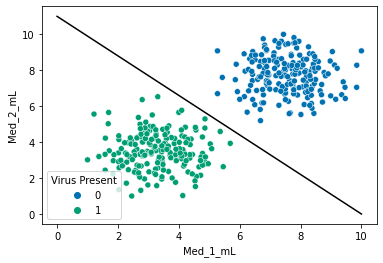

In [38]:
sns.scatterplot(x="Med_1_mL",y = "Med_2_mL", hue = "Virus Present", data = df );

# Sperating hyperplane
x = np.linspace(0,10,100)
m=-1.1
b=11
y = m*x + b
plt.plot(x,y,"black");

##  <span style = "color:#068c2a;font-family:monospace"> We can see from above a line which is a hyperplane(2d) cuts the two classes. As the data above is perfectly seperable</span>
## <span style = "color:#068c2a;font-family:monospace"> Now lets explore the SVM and model family in sklearn is SVM

In [39]:
from sklearn.svm import SVC

### <span style = "color:#068c2a;font-family:monospace"> class SVC(sklearn.svm._base.BaseSVC)|  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

## <span style = "color:#068c2a;font-family:monospace"> These are the parameters of SVC, notice it is support vector Classifier not SVM, there is a parameter of Kernel which will be used to create SVM and in addition to kernel we need to provide degree or gamma</span>
## <span style = "color:#068c2a;font-family:monospace"> Another thing to notice is C value and if we recall C is inversly proportional

## <span style = "color:#068c2a;font-family:monospace"> For now we will skip the train_test_split and scaling as we are just trying to visualize first

In [40]:
y = df["Virus Present"]

In [41]:
X = df.drop("Virus Present",axis =1)

In [42]:
model = SVC(kernel= 'linear', C= 1000)

In [43]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [44]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

## <span style = "color:#068c2a;font-family:monospace"> This is a function created for Visual Support Vecor Machine

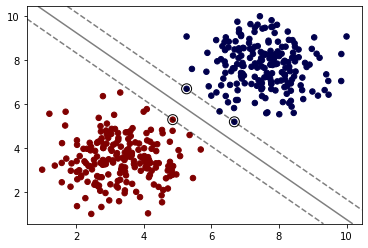

In [45]:
plot_svm_boundary(model,X,y)

## <span style = "color:#068c2a;font-family:monospace"> We can see now hyperplane, margins and support vectors associated with margins, Here C value is high

## <span style = "color:#068c2a;font-family:monospace"> With Scikit-learn C value being inversly proportion means if you set C value close to 0 , you are actully allowing lot of points to be misclassfied within the margin, We will try differnt models and then compare them.

In [46]:
model = SVC(kernel='linear',C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

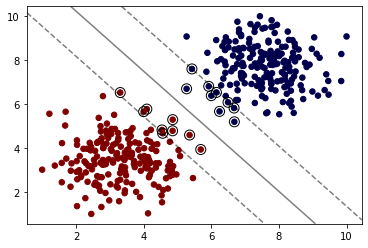

In [47]:
plot_svm_boundary(model, X, y)

## <span style = "color:#068c2a;font-family:monospace"> Now when we reduce the C value to 0.05 we can see more points are in the margin, though the hyperplane is still linear

## <span style = "color:#068c2a;font-family:monospace"> Its hard to find the best C value because it really depend on the dataset, so we will use GridSeachCV to find the optimal C value

## <span style = "color:#068c2a;font-family:monospace"> Now we will use the differnt kernel -rdf

In [48]:
model = SVC(kernel = 'rbf', C= 1)# it is a default kernel as well because it is the best kernel to use

In [49]:
model.fit(X,y)

SVC(C=1)

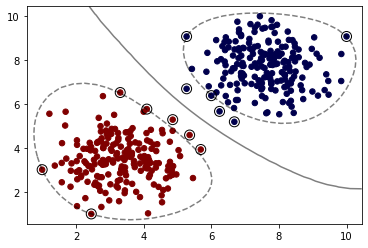

In [50]:
plot_svm_boundary(model,X,y)

## <span style = "color:#068c2a;font-family:monospace"> With RBf We can see the hyperplane is not linear becasue it project to higher dimension, its a curve and margins are now perfectly surrounding the classes

## <span style = "color:#068c2a;font-family:monospace"> We can see points surrounded by margin , but few points are outside the margin and they are support vector

## <span style = "color:#068c2a;font-family:monospace"> We have hyperparameter called Gamma as we saw before and the values it can take is 'scale','auto', or manually provide any floating point number.
* if we say gamma = "scale' it will be then 1/(n_features * X.var())
* i we say auto it uses 1/n_features.

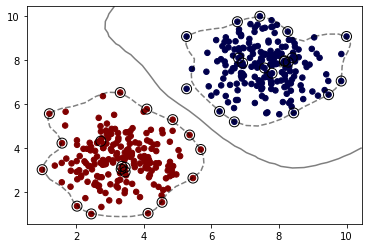

In [52]:
model = SVC(kernel='rbf', C =1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)


## <span style = "color:#068c2a;font-family:monospace"> Gamma being scale is default , but if we change to auto you can see it started picking up lot more noise. Gamma defines how much influence a single training example has, that means gamma get larger the closer the other examples have to be in order to be affected

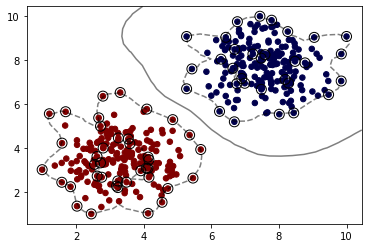

In [53]:
model = SVC(kernel='rbf', C =1,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

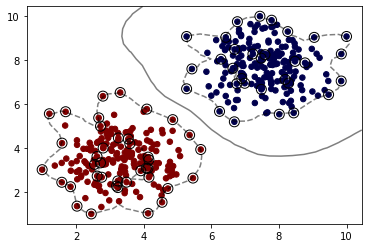

In [54]:
model = SVC(kernel='rbf', C =1,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## <span style = "color:#068c2a;font-family:monospace"> So we can see as we are increasing gamma values, model is picking up noise esentially model is overfitting.

## <span style = "color:#068c2a;font-family:monospace"> Now lets try other two kernel Sigmoid and Polynomial

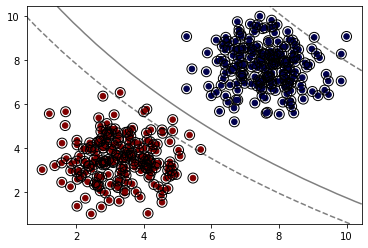

In [56]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

### <span style = "color:#068c2a;font-family:monospace">So we can see pretty much all the points are being highlighted as suppport vectors.For this particular dataset sigmoid kernel is not recomended becasue it is relying on the points even at the centre of the classes. We can keep sigmoid in GridsearchCV

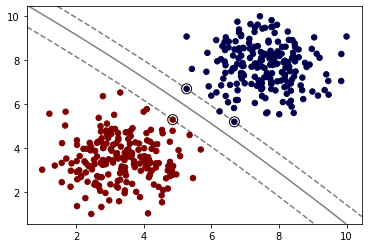

In [59]:
model = SVC(kernel="poly", degree=4, C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## <span style = "color:#068c2a;font-family:monospace"> With degree set to 1 it is same as linear kernel, but when we increase the degree then we can see the hyperplance curved a bit. For this particular dataset it will not curve much because the kernel being linear itself separetes the classes pretty well.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svm =SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":['linear','rbf']}

In [62]:
grid = GridSearchCV(svm,param_grid=param_grid)

In [63]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

## <span style = "color:#068c2a;font-family:monospace"> We have not done train_test_split and scaling but do remember to do always, we will do with SVM regression

In [64]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# <span style = "color:#068c2a;font-family:monospace"> SVM Regression with Scikit_learn

## <span style = "color:#068c2a;font-family:monospace"> The idea of Support Vector Regression is similar to Support Vector Classifier

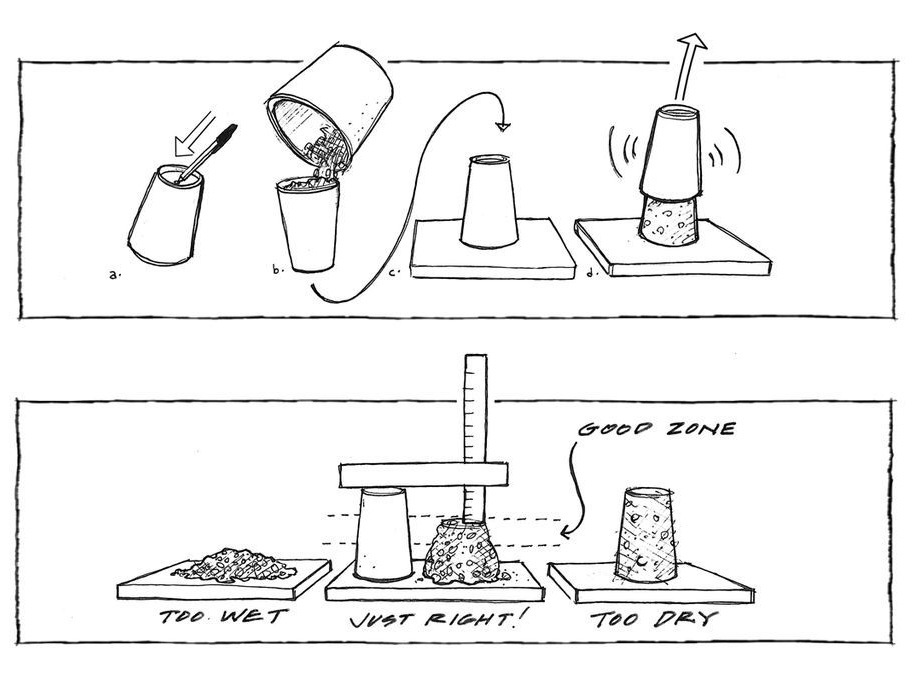

## <span style = "color:#068c2a;font-family:monospace"> We will use dataset of concrete slump test</span>
### <span style = "color:#068c2a;font-family:monospace"> Concrete Slump test measure the consistency of concrete before it actually sets and test is performed to check the workability of freshly made concrete

In [65]:
df = pd.read_csv("cement_slump.csv")

In [66]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## <span style = "color:#068c2a;font-family:monospace"> Here our target varible is compressive strenght after 28 days

<AxesSubplot:>

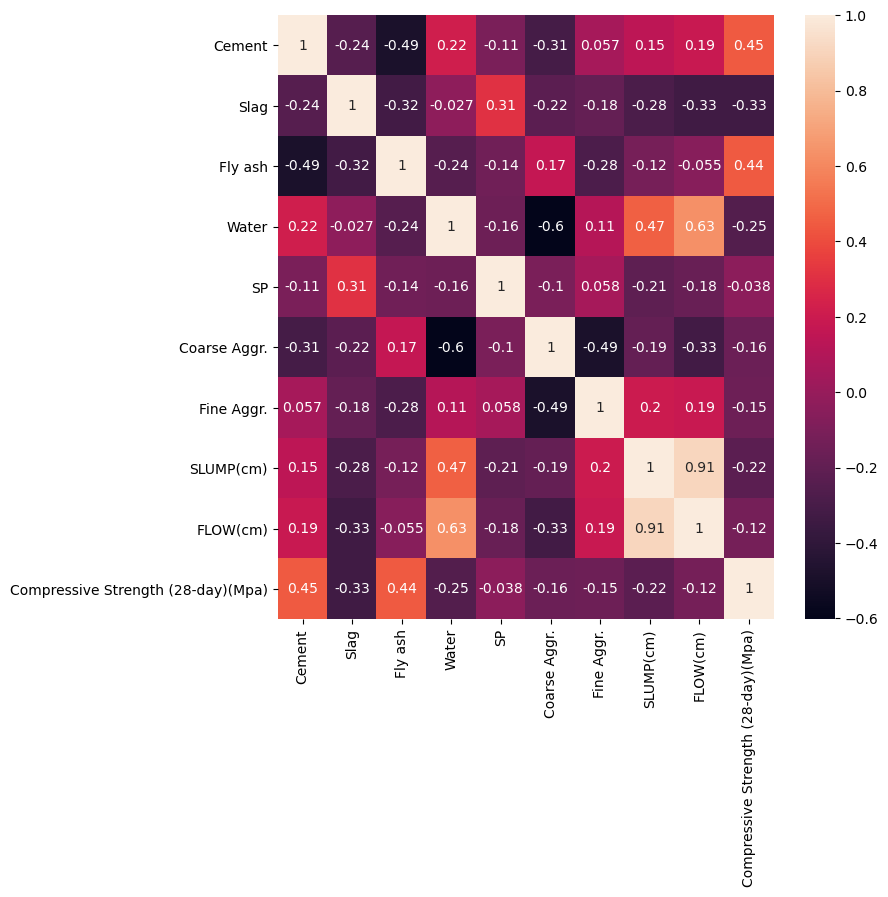

In [69]:
plt.figure(figsize=(8,8),dpi = 100)
sns.heatmap(df.corr(), annot = True)

In [70]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [71]:
X= df.drop('Compressive Strength (28-day)(Mpa)',axis =1)

In [72]:
y = df['Compressive Strength (28-day)(Mpa)']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## <span style = "color:red;font-family:monospace"> Important Note: Whenever we are dealing with any machine learning model, which really look at the geometry of feature space, we should scale the date

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
scaled_X_train = scaler.fit_transform(X_train)

In [78]:
scaled_X_test = scaler.transform(X_test)

In [79]:
from sklearn.svm import SVR, LinearSVR # linear svr provides a faster implemntation of Support Vector Regression but the
# issue with Linear SVR is it only uses linear kernel

#### <span style = "color:#068c2a;font-family:monospace"> SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

### <span style = "color:#068c2a;font-family:monospace"> with parameters of SVR they alomost like SVC,C parameter is a regularization parameter in sklearn, if we have lot of noisy observations then we should decrease it as decreasing C corresponds to more regularization also, C is inversaly proportinal.</span>
### <span style = "color:#068c2a;font-family:monospace"> One new parameter is epsilon, epsilon in SVR means how much error you are willing to allow per training data instance, if we set epsilon to be 0 means we are not allowing any error, which could lead to Overfitting default is 0.1

In [81]:
base_model = SVR()

# <span style = "color:#068c2a;font-family:monospace">Lets first try out the base model with all the defaul parameter later we will do the GridSearch CV

In [82]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [83]:
base_model_pred = base_model.predict(scaled_X_test)

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [85]:
mean_absolute_error(y_test,base_model_pred)

5.236902091259178

In [86]:
np.sqrt(mean_squared_error(y_test,base_model_pred))

6.695914838327133

In [87]:
y_test.mean()

36.26870967741935

In [90]:
param_grid_1 = {"C":[0.001,0.01,0,1,0.5,1],
               "kernel":['linear','rbf','poly'],
               'gamma':['scale','auto'],"degree":[2,3,4],
               'epsilon':[0,0.01,0.1,0.5,1,2]}

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
svr=SVR()

In [99]:
grid = GridSearchCV(svr,param_grid=param_grid_1, cv=5)

In [ ]:
grid.fit(scaled_X_train,y_train)

In [101]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [102]:
grid_pred = grid.predict(scaled_X_test)

In [103]:
mean_absolute_error(y_test,grid_pred)

2.5128012210762365

In [104]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.178210305119858

# <span style = "color:#068c2a;font-family:monospace"> With SCV and SVR always scale the data and do the GridSearchCV